#**Import main lib**

In [161]:
#Essential lib for numpy, pandas and visiualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Lib for ML regression metrics and algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor, RandomForestRegressor, VotingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.neighbors import KNeighborsRegressor


In [97]:
#Display all columns

pd.set_option('display.max_columns',None)

In [98]:
df = pd.read_csv('/content/digital_wallet_ltv_dataset.csv')

In [99]:
df.head(5)

,Customer_ID,Age,Location,Income_Level,Total_Transactions,Avg_Transaction_Value,Max_Transaction_Value,Min_Transaction_Value,Total_Spent,Active_Days,Last_Transaction_Days_Ago,Loyalty_Points_Earned,Referral_Count,Cashback_Received,App_Usage_Frequency,Preferred_Payment_Method,Support_Tickets_Raised,Issue_Resolution_Time,Customer_Satisfaction_Score,LTV
0,cust_0000,54,Urban,Low,192,16736.384023,60216.834510,6525.814861,3.213386e+06,140,209,2114,25,2224.012140,Monthly,Debit Card,3,61.568590,1,3.279546e+05
1,cust_0001,67,Suburban,High,979,14536.734683,48350.100272,2186.742245,1.423146e+07,229,240,2960,20,4026.823518,Monthly,UPI,17,60.392889,8,1.437053e+06
2,cust_0002,44,Urban,High,329,7061.372800,32521.157187,2743.406808,2.323192e+06,73,21,3170,0,1441.011395,Monthly,Debit Card,11,45.305579,4,2.419387e+05
3,cust_0003,30,Rural,High,71,16426.876453,17827.896720,4360.784994,1.166308e+06,299,285,4756,35,4365.855580,Weekly,Wallet Balance,6,22.030191,1,1.284599e+05
4,cust_0004,58,Urban,Middle,878,10800.092660,17497.634534,4532.872520,9.482481e+06,236,329,1992,18,4161.523827,Daily,UPI,18,20.634723,5,9.569514e+05


In [100]:
df.head(5)

,Customer_ID,Age,Location,Income_Level,Total_Transactions,Avg_Transaction_Value,Max_Transaction_Value,Min_Transaction_Value,Total_Spent,Active_Days,Last_Transaction_Days_Ago,Loyalty_Points_Earned,Referral_Count,Cashback_Received,App_Usage_Frequency,Preferred_Payment_Method,Support_Tickets_Raised,Issue_Resolution_Time,Customer_Satisfaction_Score,LTV
0,cust_0000,54,Urban,Low,192,16736.384023,60216.834510,6525.814861,3.213386e+06,140,209,2114,25,2224.012140,Monthly,Debit Card,3,61.568590,1,3.279546e+05
1,cust_0001,67,Suburban,High,979,14536.734683,48350.100272,2186.742245,1.423146e+07,229,240,2960,20,4026.823518,Monthly,UPI,17,60.392889,8,1.437053e+06
2,cust_0002,44,Urban,High,329,7061.372800,32521.157187,2743.406808,2.323192e+06,73,21,3170,0,1441.011395,Monthly,Debit Card,11,45.305579,4,2.419387e+05
3,cust_0003,30,Rural,High,71,16426.876453,17827.896720,4360.784994,1.166308e+06,299,285,4756,35,4365.855580,Weekly,Wallet Balance,6,22.030191,1,1.284599e+05
4,cust_0004,58,Urban,Middle,878,10800.092660,17497.634534,4532.872520,9.482481e+06,236,329,1992,18,4161.523827,Daily,UPI,18,20.634723,5,9.569514e+05


In [101]:
df.tail(5)

,Customer_ID,Age,Location,Income_Level,Total_Transactions,Avg_Transaction_Value,Max_Transaction_Value,Min_Transaction_Value,Total_Spent,Active_Days,Last_Transaction_Days_Ago,Loyalty_Points_Earned,Referral_Count,Cashback_Received,App_Usage_Frequency,Preferred_Payment_Method,Support_Tickets_Raised,Issue_Resolution_Time,Customer_Satisfaction_Score,LTV
6995,cust_6995,68,Suburban,High,340,162.703503,605.997495,80.352666,5.531919e+04,78,20,521,32,654.218655,Monthly,Credit Card,14,3.351374,3,1.244681e+04
6996,cust_6996,62,Suburban,High,647,1575.707877,4702.522747,359.511332,1.019483e+06,271,252,2972,40,3574.857418,Monthly,Wallet Balance,13,19.735330,3,1.131049e+05
6997,cust_6997,16,Urban,Middle,481,14429.355178,17207.737631,1510.598329,6.940520e+06,225,348,2423,8,2899.068571,Monthly,UPI,12,45.036932,2,7.002484e+05
6998,cust_6998,32,Urban,High,574,8005.027184,33203.795716,1976.326124,4.594886e+06,121,50,634,31,2432.363200,Monthly,Credit Card,11,44.145749,1,4.636404e+05
6999,cust_6999,17,Suburban,Middle,825,15697.668867,50584.163430,7833.230956,1.295058e+07,223,189,648,12,638.252000,Monthly,Credit Card,17,35.113661,1,1.298235e+06


In [102]:
df.shape

(7000, 20)

In [103]:
#Check null values from dataset

df.isnull().sum()

,0
Customer_ID,0
Age,0
Location,0
Income_Level,0
Total_Transactions,0
Avg_Transaction_Value,0
Max_Transaction_Value,0
Min_Transaction_Value,0
Total_Spent,0
Active_Days,0


In [104]:
df.nunique()

,0
Customer_ID,7000
Age,54
Location,3
Income_Level,3
Total_Transactions,999
Avg_Transaction_Value,7000
Max_Transaction_Value,7000
Min_Transaction_Value,7000
Total_Spent,7000
Active_Days,365


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer_ID                  7000 non-null   object 
 1   Age                          7000 non-null   int64  
 2   Location                     7000 non-null   object 
 3   Income_Level                 7000 non-null   object 
 4   Total_Transactions           7000 non-null   int64  
 5   Avg_Transaction_Value        7000 non-null   float64
 6   Max_Transaction_Value        7000 non-null   float64
 7   Min_Transaction_Value        7000 non-null   float64
 8   Total_Spent                  7000 non-null   float64
 9   Active_Days                  7000 non-null   int64  
 10  Last_Transaction_Days_Ago    7000 non-null   int64  
 11  Loyalty_Points_Earned        7000 non-null   int64  
 12  Referral_Count               7000 non-null   int64  
 13  Cashback_Received 

#Delete unneccassry columns:

1) Customer_ID


In [106]:
df.drop(columns=['Customer_ID'], inplace=True)
df.head(5)

,Age,Location,Income_Level,Total_Transactions,Avg_Transaction_Value,Max_Transaction_Value,Min_Transaction_Value,Total_Spent,Active_Days,Last_Transaction_Days_Ago,Loyalty_Points_Earned,Referral_Count,Cashback_Received,App_Usage_Frequency,Preferred_Payment_Method,Support_Tickets_Raised,Issue_Resolution_Time,Customer_Satisfaction_Score,LTV
0,54,Urban,Low,192,16736.384023,60216.834510,6525.814861,3.213386e+06,140,209,2114,25,2224.012140,Monthly,Debit Card,3,61.568590,1,3.279546e+05
1,67,Suburban,High,979,14536.734683,48350.100272,2186.742245,1.423146e+07,229,240,2960,20,4026.823518,Monthly,UPI,17,60.392889,8,1.437053e+06
2,44,Urban,High,329,7061.372800,32521.157187,2743.406808,2.323192e+06,73,21,3170,0,1441.011395,Monthly,Debit Card,11,45.305579,4,2.419387e+05
3,30,Rural,High,71,16426.876453,17827.896720,4360.784994,1.166308e+06,299,285,4756,35,4365.855580,Weekly,Wallet Balance,6,22.030191,1,1.284599e+05
4,58,Urban,Middle,878,10800.092660,17497.634534,4532.872520,9.482481e+06,236,329,1992,18,4161.523827,Daily,UPI,18,20.634723,5,9.569514e+05


##**Data Visiualization process:**

In [107]:
location = df['Location'].value_counts().reset_index(name='count_loc')
location

,Location,count_loc
0,Urban,2368
1,Suburban,2320
2,Rural,2312


In [108]:
#Count of types of locations:

fig = px.histogram(
    location,
    x='Location',
    y='count_loc',
    nbins=10,
    color_discrete_sequence=['#1f77b4']
)

fig.update_layout(
  showlegend=False,
  xaxis_title='Country',
  yaxis_title="Count",
  bargap=0.1)

fig.show()

In [109]:
df.columns

Index(['Age', 'Location', 'Income_Level', 'Total_Transactions',
       'Avg_Transaction_Value', 'Max_Transaction_Value',
       'Min_Transaction_Value', 'Total_Spent', 'Active_Days',
       'Last_Transaction_Days_Ago', 'Loyalty_Points_Earned', 'Referral_Count',
       'Cashback_Received', 'App_Usage_Frequency', 'Preferred_Payment_Method',
       'Support_Tickets_Raised', 'Issue_Resolution_Time',
       'Customer_Satisfaction_Score', 'LTV'],
      dtype='object')

In [110]:
active_loc = df.groupby('Location')['Active_Days'].mean().nlargest(5).reset_index(name='day_mean')
active_loc

,Location,day_mean
0,Suburban,182.843534
1,Rural,182.533304
2,Urban,180.460304


In [111]:
fig = px.histogram(
    active_loc,
    x='Location',
    y='day_mean',
    color='Location'
)

fig.show()

In [112]:
print(df['Age'].min())
print(df['Age'].max())

16
69


In [113]:
import pandas as pd

def categorize_age(df):
    def age_category(age):
        if 16 <= age <= 19:
            return 'Teen'
        elif 20 <= age <= 29:
            return 'Young Adult'
        elif 30 <= age <= 39:
            return 'Adult'
        elif 40 <= age <= 59:
            return 'Middle-aged'
        elif 60 <= age <= 69:
            return 'Senior'
        return 'Unknown'

    df['Age_Category'] = df['Age'].apply(age_category)

    return df

df = categorize_age(df)

df[['Age', 'Age_Category']].head()


,Age,Age_Category
0,54,Middle-aged
1,67,Senior
2,44,Middle-aged
3,30,Adult
4,58,Middle-aged


In [114]:
age_cat_df = df['Age_Category'].value_counts().nlargest().reset_index(name='count_cat')
age_cat_df

,Age_Category,count_cat
0,Middle-aged,2581
1,Senior,1328
2,Adult,1326
3,Young Adult,1246
4,Teen,519


In [115]:
fig = px.histogram(
    age_cat_df,
    x='Age_Category',
    y='count_cat',
    color='Age_Category'
)

fig.show()

In [116]:
df.columns

Index(['Age', 'Location', 'Income_Level', 'Total_Transactions',
       'Avg_Transaction_Value', 'Max_Transaction_Value',
       'Min_Transaction_Value', 'Total_Spent', 'Active_Days',
       'Last_Transaction_Days_Ago', 'Loyalty_Points_Earned', 'Referral_Count',
       'Cashback_Received', 'App_Usage_Frequency', 'Preferred_Payment_Method',
       'Support_Tickets_Raised', 'Issue_Resolution_Time',
       'Customer_Satisfaction_Score', 'LTV', 'Age_Category'],
      dtype='object')

In [117]:
age_cat_spent = df.groupby('Age_Category')['Total_Spent'].mean().reset_index(name='Total')
age_cat_spent['Total'] = round(age_cat_spent['Total'], 2)
age_cat_spent

,Age_Category,Total
0,Adult,4962766.24
1,Middle-aged,5087450.79
2,Senior,4958277.01
3,Teen,4640840.91
4,Young Adult,5063905.60


In [118]:
fig = px.histogram(
    age_cat_spent,
    x='Age_Category',
    y='Total',
    color='Age_Category'
)

fig.show()

In [119]:
#Age category satification mean:

age_satification = df.groupby('Age_Category')['Customer_Satisfaction_Score'].mean().reset_index(name='Satificationscore')
age_satification = age_satification.sort_index()
age_satification

,Age_Category,Satificationscore
0,Adult,5.548265
1,Middle-aged,5.462611
2,Senior,5.419428
3,Teen,5.522158
4,Young Adult,5.484751


In [120]:
fig = px.histogram(
    age_satification,
    x='Age_Category',
    y='Satificationscore',
    color='Age_Category'
)

fig.show()

<Axes: xlabel='Income_Level', ylabel='Total_Spent'>

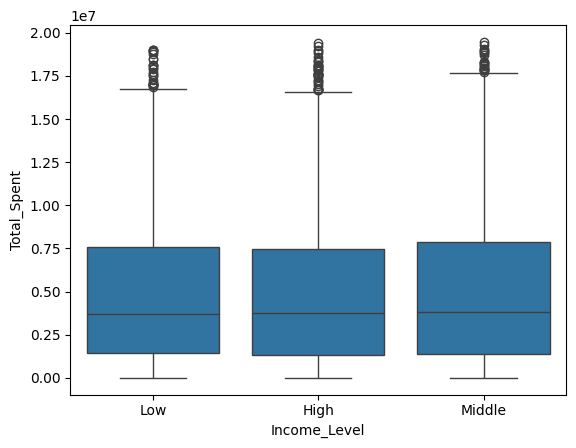

In [121]:
df.groupby('Income_Level')[['Total_Spent', 'Avg_Transaction_Value']].mean()
sns.boxplot(x='Income_Level', y='Total_Spent', data=df)


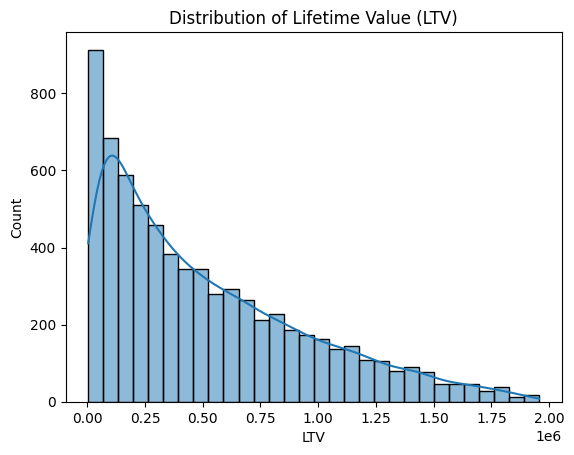

In [122]:
#6. Customer Lifetime Value (LTV) Distribution

sns.histplot(df['LTV'], bins=30, kde=True)
plt.title('Distribution of Lifetime Value (LTV)')
plt.show()


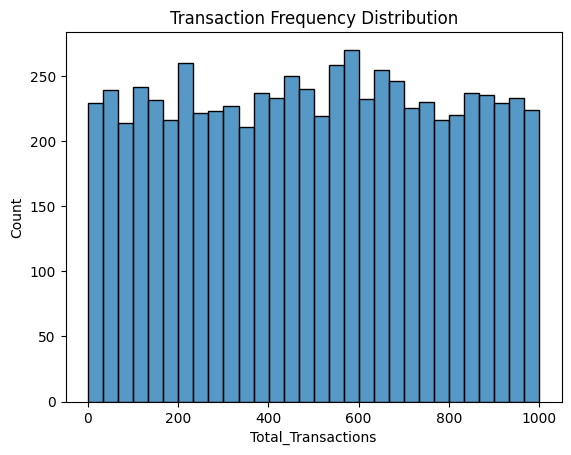

In [123]:
#7. Transaction Frequency Analysis

sns.histplot(df['Total_Transactions'], bins=30)
plt.title('Transaction Frequency Distribution')
plt.show()


<Axes: xlabel='Customer_Satisfaction_Score', ylabel='Issue_Resolution_Time'>

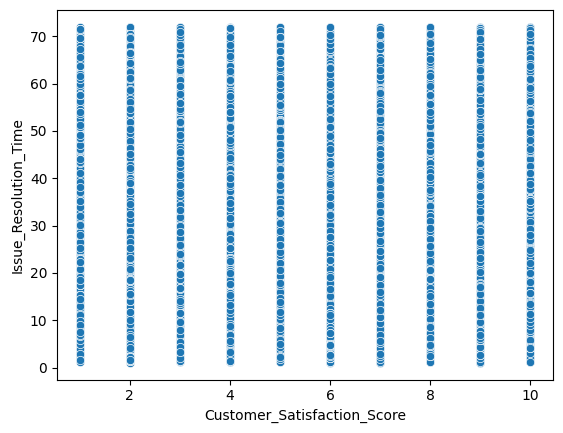

In [124]:
# Customer Satisfaction vs Issue Resolution Time
sns.scatterplot(x='Customer_Satisfaction_Score', y='Issue_Resolution_Time', data=df)


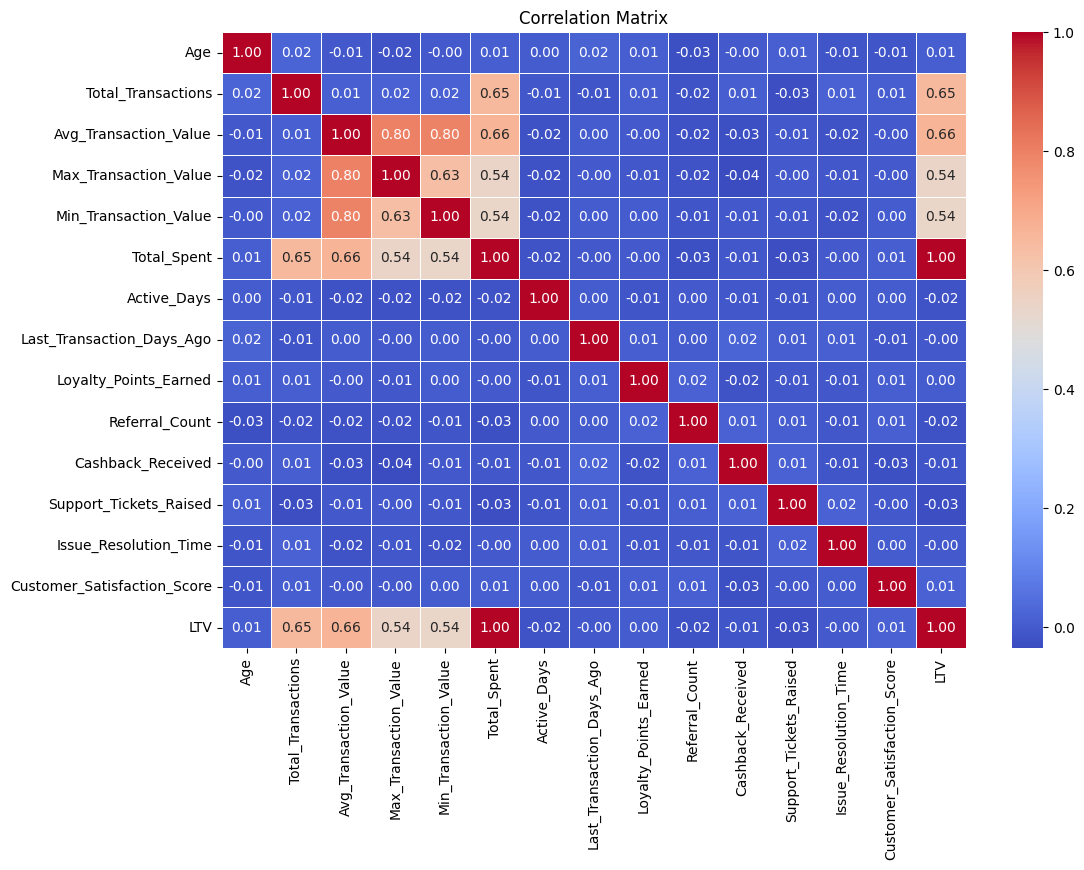

In [125]:
# Compute the correlation matrix for numerical columns
numerical_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [126]:
#Delete some columns which they are multicoliniarty

#  LTV -> Total_Spent  1 (Part 1)
df.drop(columns=['Total_Spent'], inplace=True)
df.head(5)

,Age,Location,Income_Level,Total_Transactions,Avg_Transaction_Value,Max_Transaction_Value,Min_Transaction_Value,Active_Days,Last_Transaction_Days_Ago,Loyalty_Points_Earned,Referral_Count,Cashback_Received,App_Usage_Frequency,Preferred_Payment_Method,Support_Tickets_Raised,Issue_Resolution_Time,Customer_Satisfaction_Score,LTV,Age_Category
0,54,Urban,Low,192,16736.384023,60216.834510,6525.814861,140,209,2114,25,2224.012140,Monthly,Debit Card,3,61.568590,1,3.279546e+05,Middle-aged
1,67,Suburban,High,979,14536.734683,48350.100272,2186.742245,229,240,2960,20,4026.823518,Monthly,UPI,17,60.392889,8,1.437053e+06,Senior
2,44,Urban,High,329,7061.372800,32521.157187,2743.406808,73,21,3170,0,1441.011395,Monthly,Debit Card,11,45.305579,4,2.419387e+05,Middle-aged
3,30,Rural,High,71,16426.876453,17827.896720,4360.784994,299,285,4756,35,4365.855580,Weekly,Wallet Balance,6,22.030191,1,1.284599e+05,Adult
4,58,Urban,Middle,878,10800.092660,17497.634534,4532.872520,236,329,1992,18,4161.523827,Daily,UPI,18,20.634723,5,9.569514e+05,Middle-aged


#**Let's check outliers**

In [127]:
def outliers(data, column):

  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

len_outliers = {}

for i in df.select_dtypes(include=np.number).columns:
  outliers_iqr = outliers(df, i)
  len_outliers[i] = len(outliers_iqr)

len_outliers

{'Age': 0,
 'Total_Transactions': 0,
 'Avg_Transaction_Value': 0,
 'Max_Transaction_Value': 19,
 'Min_Transaction_Value': 37,
 'Active_Days': 0,
 'Last_Transaction_Days_Ago': 0,
 'Loyalty_Points_Earned': 0,
 'Referral_Count': 0,
 'Cashback_Received': 0,
 'Support_Tickets_Raised': 0,
 'Issue_Resolution_Time': 0,
 'Customer_Satisfaction_Score': 0,
 'LTV': 86}

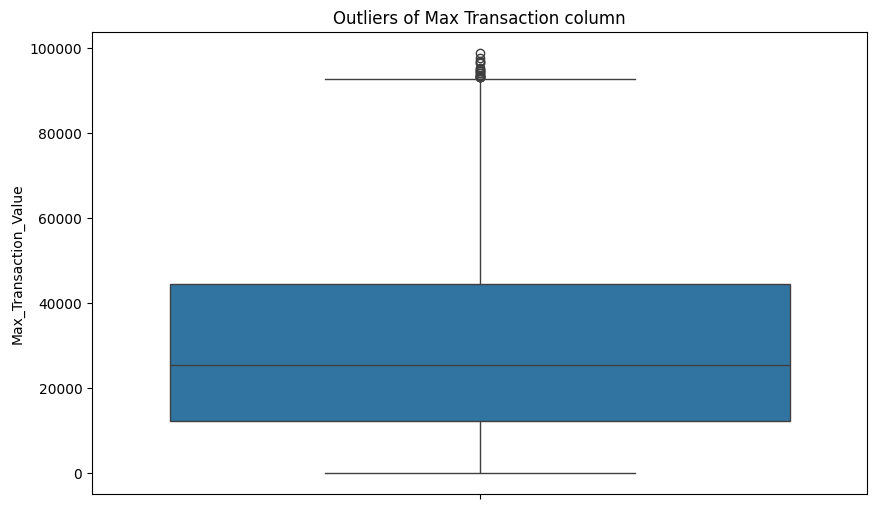

In [128]:
#Check visiualization columsn which they have outliers

fig = px.histogram(
    df,
    x='Max_Transaction_Value',
    color_discrete_sequence=['#1f77b4'],
    title='Distribution of Max Transaction'
)

fig.update_layout(
  showlegend=False,
  xaxis_title=df[i].name,
  yaxis_title="Count",
  bargap=0.1
)

fig.show()

#----------------------------------------------------------
#Check visiualization wiht boxplot

plt.figure(figsize=(10, 6))
sns.boxplot(
    y=df['Max_Transaction_Value'],
    color='#1f77b4'
)

plt.title('Outliers of Max Transaction column')
plt.ylabel("Max_Transaction_Value")
plt.show()


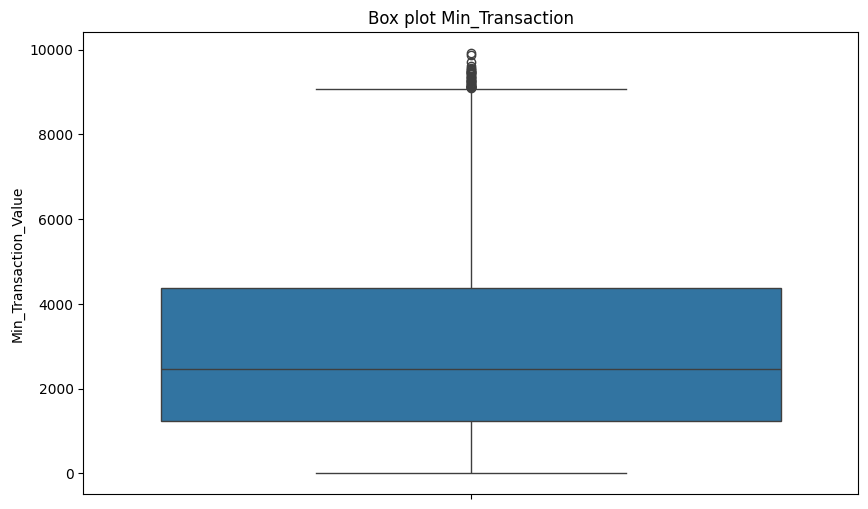

In [129]:
#Check visiualization columsn which they have outliers

#---------------- Histogram ------------------
fig = px.histogram(
    df,
    x='Min_Transaction_Value',
    color_discrete_sequence=['#1f77b4'],
    title='Distribution of Min Transaction'
)

fig.update_layout(
  showlegend=False,
  xaxis_title=df['Min_Transaction_Value'].name,
  yaxis_title="Count",
  bargap=0.1
)

fig.show()


#------------Box Plot--------------------------
plt.figure(figsize=(10, 6))
sns.boxplot(
    y='Min_Transaction_Value',
    color='#1f77b4',
    data=df
)

plt.title('Box plot Min_Transaction')
plt.ylabel('Min_Transaction_Value')

plt.show()

In [130]:
#Use winsorization method for solve outliers problem

from scipy.stats import mstats

# Winsorization
def winsorize_column(data, column, limits=(0.15, 0.25)):
    """Apply winsorization to handle extreme values"""
    return mstats.winsorize(data[column], limits=limits)

df['Max_Transaction_Value_win'] = winsorize_column(df, 'Max_Transaction_Value')
df['Min_Transaction_Value_win'] = winsorize_column(df, 'Min_Transaction_Value')


#Check outliers  again with visiualization

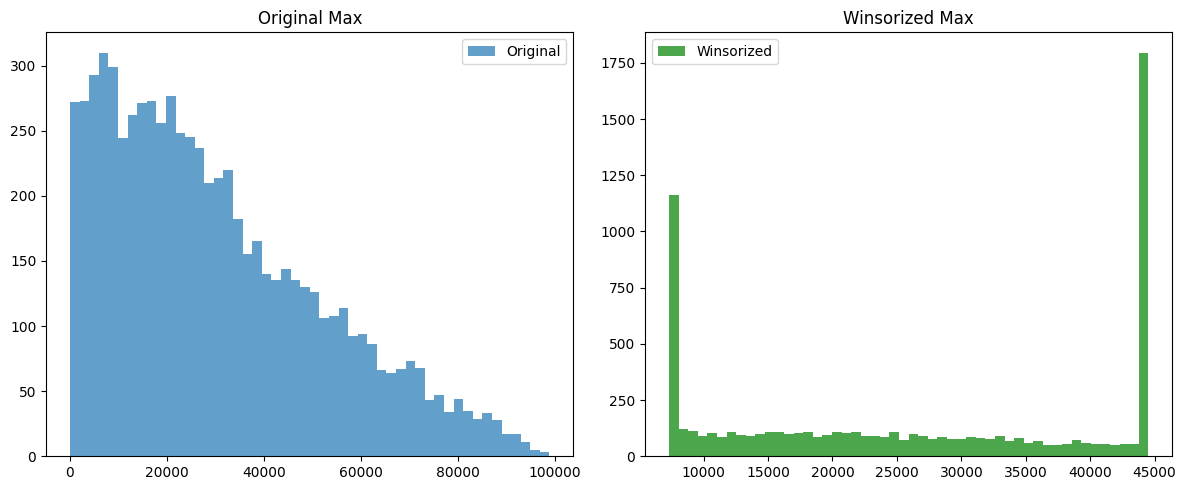

In [131]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.hist(df['Max_Transaction_Value'], bins=50, alpha=0.7, label='Original')
ax1.set_title('Original Max')
ax1.legend()

ax2.hist(df['Max_Transaction_Value_win'], bins=50, alpha=0.7,
         color='green', label='Winsorized')
ax2.set_title('Winsorized Max')
ax2.legend()

plt.tight_layout()

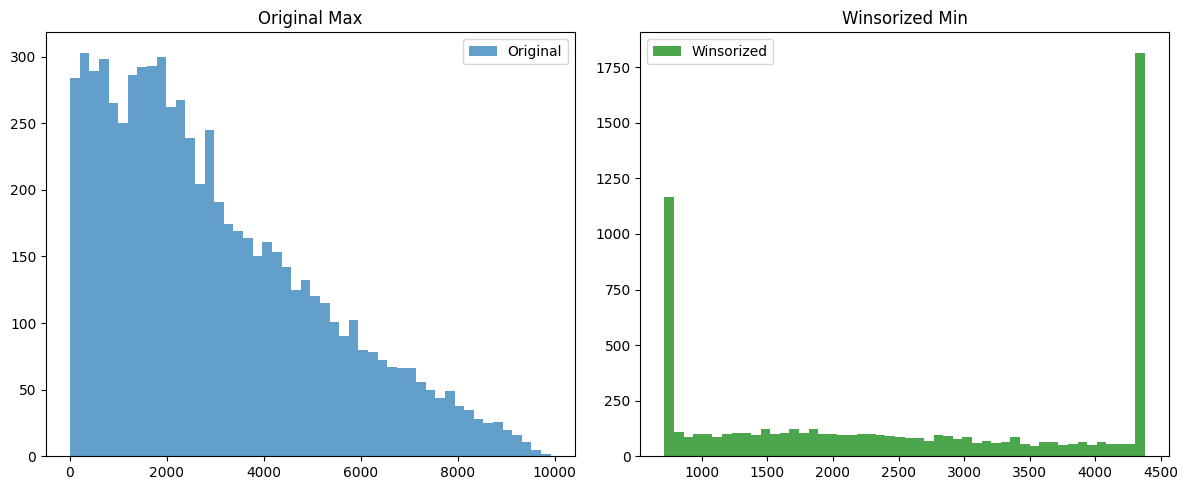

In [132]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.hist(df['Min_Transaction_Value'], bins=50, alpha=0.7, label='Original')
ax1.set_title('Original Max')
ax1.legend()

ax2.hist(df['Min_Transaction_Value_win'], bins=50, alpha=0.7,
         color='green', label='Winsorized')
ax2.set_title('Winsorized Min')
ax2.legend()

plt.tight_layout()

In [133]:
df.isnull().sum()

,0
Age,0
Location,0
Income_Level,0
Total_Transactions,0
Avg_Transaction_Value,0
Max_Transaction_Value,0
Min_Transaction_Value,0
Active_Days,0
Last_Transaction_Days_Ago,0
Loyalty_Points_Earned,0


In [134]:
df.head(5)

,Age,Location,Income_Level,Total_Transactions,Avg_Transaction_Value,Max_Transaction_Value,Min_Transaction_Value,Active_Days,Last_Transaction_Days_Ago,Loyalty_Points_Earned,Referral_Count,Cashback_Received,App_Usage_Frequency,Preferred_Payment_Method,Support_Tickets_Raised,Issue_Resolution_Time,Customer_Satisfaction_Score,LTV,Age_Category,Max_Transaction_Value_win,Min_Transaction_Value_win
0,54,Urban,Low,192,16736.384023,60216.834510,6525.814861,140,209,2114,25,2224.012140,Monthly,Debit Card,3,61.568590,1,3.279546e+05,Middle-aged,44515.289613,4378.453687
1,67,Suburban,High,979,14536.734683,48350.100272,2186.742245,229,240,2960,20,4026.823518,Monthly,UPI,17,60.392889,8,1.437053e+06,Senior,44515.289613,2186.742245
2,44,Urban,High,329,7061.372800,32521.157187,2743.406808,73,21,3170,0,1441.011395,Monthly,Debit Card,11,45.305579,4,2.419387e+05,Middle-aged,32521.157187,2743.406808
3,30,Rural,High,71,16426.876453,17827.896720,4360.784994,299,285,4756,35,4365.855580,Weekly,Wallet Balance,6,22.030191,1,1.284599e+05,Adult,17827.896720,4360.784994
4,58,Urban,Middle,878,10800.092660,17497.634534,4532.872520,236,329,1992,18,4161.523827,Daily,UPI,18,20.634723,5,9.569514e+05,Middle-aged,17497.634534,4378.453687


##Split data into dependent(**y**) and independent(**X**) columns

In [135]:
X = df.drop('LTV', axis=1)
y = df['LTV']

##Split data into train test split

In [136]:
from sklearn.model_selection import  train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Data has same range for numerical columns so use scaling method

In [137]:
from sklearn.preprocessing import StandardScaler

num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_test[num_cols] = scaler.transform(X_test[num_cols])


Divided categorical columns into 2 main parts:

##**1) One-hot encoding**

##**2) Ordinal encoding**

In [140]:
X_train = pd.get_dummies(X_train, columns=['Location', 'Preferred_Payment_Method', 'Age_Category'])
X_test = pd.get_dummies(X_test, columns=['Location', 'Preferred_Payment_Method', 'Age_Category'])

X_train, X_test = X_train.align(X_test, join='left', axis=1)

In [142]:
X_train['App_Usage_Frequency'].value_counts()

,count
App_Usage_Frequency,
Daily,1879
Monthly,1865
Weekly,1856


In [143]:
X_train['Income_Level'].value_counts()

,count
Income_Level,
Middle,1934
Low,1853
High,1813


In [144]:
X_train['App_Usage_Frequency'] = X_train['App_Usage_Frequency'].map({'Daily':3, 'Weekly':2, 'Monthly':1})
X_test['App_Usage_Frequency'] = X_test['App_Usage_Frequency'].map({'Daily':3, 'Weekly':2, 'Monthly':1})

X_train['Income_Level'] = X_train['Income_Level'].map({'High':3, 'Middle':2, 'Low':1})
X_test['Income_Level'] = X_test['Income_Level'].map({'High':3, 'Middle':2, 'Low':1})

In [145]:
X_train.head(5)

,Age,Income_Level,Total_Transactions,Avg_Transaction_Value,Max_Transaction_Value,Min_Transaction_Value,Active_Days,Last_Transaction_Days_Ago,Loyalty_Points_Earned,Referral_Count,Cashback_Received,App_Usage_Frequency,Support_Tickets_Raised,Issue_Resolution_Time,Customer_Satisfaction_Score,Max_Transaction_Value_win,Min_Transaction_Value_win,Location_Rural,Location_Suburban,Location_Urban,Preferred_Payment_Method_Credit Card,Preferred_Payment_Method_Debit Card,Preferred_Payment_Method_UPI,Preferred_Payment_Method_Wallet Balance,Age_Category_Adult,Age_Category_Middle-aged,Age_Category_Senior,Age_Category_Teen,Age_Category_Young Adult
1032,-0.106848,1,0.518157,-0.611016,-0.031940,-0.718858,-0.158663,1.179069,1.274051,-0.941248,0.130970,1,-1.333875,1.386863,-0.171731,0.218779,-0.843897,False,True,False,True,False,False,False,False,True,False,False,False
6339,0.087400,2,-1.374745,-1.491104,-1.303642,-1.267898,0.012809,0.147597,-1.172484,1.454283,1.410677,1,0.493758,0.456407,-1.573616,-1.336380,-1.337811,True,False,False,True,False,False,False,False,True,False,False,False
3886,1.058637,3,-0.536961,-0.750326,-0.576045,-0.795923,-1.435180,-1.609725,-0.536509,-1.557242,-1.475503,2,0.826054,-0.444060,0.879683,-0.619528,-0.964608,False,False,True,False,True,False,False,False,True,False,False,False
2653,0.022651,3,1.317382,-1.128422,-0.921155,-1.126370,1.041644,1.561095,1.204308,-0.941248,1.655547,1,-0.336985,-0.922154,-0.872673,-1.151242,-1.337811,True,False,False,False,True,False,False,False,True,False,False,False
6914,0.799640,1,-1.592078,0.375511,0.664473,-0.238519,1.213117,1.379633,1.320316,0.701402,-0.738300,1,0.327609,-0.677565,-1.573616,1.261664,-0.091516,True,False,False,True,False,False,False,False,True,False,False,False


#Use linear regression

In [148]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("Linear Regression Metrics:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_lr))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_lr))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R-squared (R²):", r2_score(y_test, y_pred_lr))


Linear Regression Metrics:
Mean Absolute Error (MAE): 126238.81691066142
Mean Squared Error (MSE): 28583509333.408325
Root Mean Squared Error (RMSE): 169066.58254489064
R-squared (R²): 0.8531971950217458


In [149]:
# Calculate MAE, MSE, RMSE, and R² for both training and test sets


y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)



print("Training Data Evaluation Metrics:")
print(f"MAE: {mae_train}")
print(f"MSE: {mse_train}")
print(f"RMSE: {rmse_train}")
print(f"R²: {r2_train}")

print("\nTest Data Evaluation Metrics:")
print(f"MAE: {mae_test}")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"R²: {r2_test}")

Training Data Evaluation Metrics:
MAE: 123825.07553980265
MSE: 27133562871.005703
RMSE: 164722.68474926488
R²: 0.8588372048200696

Test Data Evaluation Metrics:
MAE: 126238.81691066142
MSE: 28583509333.408325
RMSE: 169066.58254489064
R²: 0.8531971950217458


In [150]:
# Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Regressor Metrics:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_dt))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_dt))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred_dt)))
print("R-squared (R²):", r2_score(y_test, y_pred_dt))


Decision Tree Regressor Metrics:
Mean Absolute Error (MAE): 15252.722709135338
Mean Squared Error (MSE): 463068261.46668875
Root Mean Squared Error (RMSE): 21519.020922585878
R-squared (R²): 0.9976217154133604


In [152]:
# Calculate MAE, MSE, RMSE, and R² for both training and test sets

y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)


print("Training Data Evaluation Metrics:")
print(f"MAE: {mae_train}")
print(f"MSE: {mse_train}")
print(f"RMSE: {rmse_train}")
print(f"R²: {r2_train}")

print("\nTest Data Evaluation Metrics:")
print(f"MAE: {mae_test}")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"R²: {r2_test}")

#Underfitting !!!!!!!!!!!!!!!!!!!!!!!!!

Training Data Evaluation Metrics:
MAE: 0.0
MSE: 0.0
RMSE: 0.0
R²: 1.0

Test Data Evaluation Metrics:
MAE: 15252.722709135338
MSE: 463068261.46668875
RMSE: 21519.020922585878
R²: 0.9976217154133604


In [154]:
# Gradient Boosting Regressor (Boosting)
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

print("Gradient Boosting Regressor Metrics:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_gb))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_gb))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred_gb)))
print("R-squared (R²):", r2_score(y_test, y_pred_gb))


Gradient Boosting Regressor Metrics:
Mean Absolute Error (MAE): 13730.733480474108
Mean Squared Error (MSE): 312762762.6686463
Root Mean Squared Error (RMSE): 17685.100018621502
R-squared (R²): 0.9983936734178809


In [155]:
# Calculate MAE, MSE, RMSE, and R² for both training and test sets

y_train_pred = gb_model.predict(X_train)
y_test_pred = gb_model.predict(X_test)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)


print("Training Data Evaluation Metrics:")
print(f"MAE: {mae_train}")
print(f"MSE: {mse_train}")
print(f"RMSE: {rmse_train}")
print(f"R²: {r2_train}")

print("\nTest Data Evaluation Metrics:")
print(f"MAE: {mae_test}")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"R²: {r2_test}")

Training Data Evaluation Metrics:
MAE: 12168.416025589087
MSE: 252427505.34913635
RMSE: 15887.967313320365
R²: 0.9986867418626598

Test Data Evaluation Metrics:
MAE: 13730.733480474108
MSE: 312762762.6686463
RMSE: 17685.100018621502
R²: 0.9983936734178809


In [157]:
bagging_model = BaggingRegressor(estimator=DecisionTreeRegressor(),
                                 n_estimators=100,
                                 random_state=42)

# Fit the Bagging Regressor on the training data
bagging_model.fit(X_train, y_train)

# Predict on the test data
y_pred_bagging = bagging_model.predict(X_test)

# Print metrics for the Bagging Regressor
print("Bagging Regressor Metrics:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_bagging))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_bagging))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred_bagging)))
print("R-squared (R²):", r2_score(y_test, y_pred_bagging))

Bagging Regressor Metrics:
Mean Absolute Error (MAE): 6440.820044140885
Mean Squared Error (MSE): 78350996.75808224
Root Mean Squared Error (RMSE): 8851.609839915123
R-squared (R²): 0.9995975950341589


In [160]:
# Calculate MAE, MSE, RMSE, and R² for both training and test sets

y_train_pred = bagging_model.predict(X_train)
y_test_pred = bagging_model.predict(X_test)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)



print("Training Data Evaluation Metrics:")
print(f"MAE: {mae_train}")
print(f"MSE: {mse_train}")
print(f"RMSE: {rmse_train}")
print(f"R²: {r2_train}")

print("\nTest Data Evaluation Metrics:")
print(f"MAE: {mae_test}")
print(f"MSE: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"R²: {r2_test}")

Training Data Evaluation Metrics:
MAE: 2620.3503897949263
MSE: 13487260.33039787
RMSE: 3672.5005555340454
R²: 0.9999298323122323

Test Data Evaluation Metrics:
MAE: 6440.820044140885
MSE: 78350996.75808224
RMSE: 8851.609839915123
R²: 0.9995975950341589
